In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def get_gradients_xy(img, ksize):
    ## Student Code ~ 2 lines of codes
    #print(img.dtype)
    sobelx = cv2.Sobel(img, cv2.CV_16S, 1,0,ksize=ksize)
    sobely = cv2.Sobel(img, cv2.CV_16S, 0,1,ksize=ksize)
    #
    sobelx = np.absolute(sobelx)
    sobely = np.absolute(sobely)

    sobelx = np.uint8(sobelx)
    sobely = np.uint8(sobely)

    return sobelx, sobely
    ## Student Code Ends


def rescale(img, min,max):
    ## Student Code
    img = (img-img.min())/float(img.max()-img.min())
    img = min + img * (max-min)
    ## End Student Code
    return img

In [4]:
filename = 'chessboard.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


In [5]:
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

In [6]:
#result is dilated for marking the corners, not important
kernal = np.ones((3,3),np.uint8)
dst = cv2.dilate(dst,kernal)

In [7]:
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

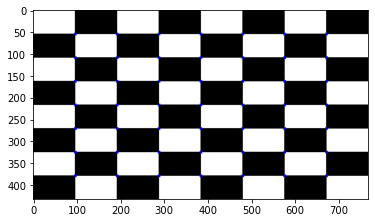

In [8]:
#cv2.imshow('dst',img)
plt.imshow(img)
#if cv2.waitKey(0) & 0xff == 27:
#    cv2.destroyAllWindows()

In [9]:
def get_gradients_xy(img, ksize):
    ## Student Code ~ 2 lines of codes
    #print(img.dtype)
    sobelx = cv2.Sobel(img, cv2.CV_16S, 1,0,ksize=ksize)
    sobely = cv2.Sobel(img, cv2.CV_16S, 0,1,ksize=ksize)
    #
    sobelx = np.absolute(sobelx)
    sobely = np.absolute(sobely)

    sobelx = np.uint8(sobelx)
    sobely = np.uint8(sobely)

    return sobelx, sobely
    ## Student Code Ends


def rescale(img, min,max):
    ## Student Code
    img = (img-img.min())/float(img.max()-img.min())
    img = min + img * (max-min)
    ## End Student Code
    return img

In [10]:
def NonMaximalSuppression(img, radius):
    """
    consider only the max value
    within window of size(radious x radious)
    around each pixel and assume all other value with 0
    """
    suppresedImg = np.zeros(img.shape,dtype=np.uint8)
    height = img.shape[0]
    width = img.shape[1]
    max = -1 
    posX = -1 
    posY = -1
    for row in range (0,height,radius):
      for column in range (0,width, radius):
        filter = img [row:row+radius,column:column+radius]
        for filterRow in range(0,radius):
          for filterColumn in range(0,radius):
            if filter[filterRow][filterColumn]> max:
              max = filter[filterRow][filterColumn]
              posX = filterRow
              posY = filterColumn
        suppresedImg[row+posX][column+posY] = max
        max=-1
        posX = -1
        posY = -1
    return suppresedImg
   

In [11]:
# 1- gradients in both the X and Y directions.
def harris(img, thresh=200, radius=2, verbose=True):
    Gx, Gy = get_gradients_xy(img, 5)
    if verbose:
        cv2.imshow("Gradients", np.hstack([Gx, Gy]))

    # 2- smooth the derivative a little using gaussian
    #Student Code ~ 2 Lines
    Gx = cv2.GaussianBlur(Gx, (5, 5), sigmaX=3,sigmaY=0)
    Gy = cv2.GaussianBlur(Gy, (5, 5), sigmaX=0,sigmaY=3)
    #End Student Code
    
    cv2.imshow("Blured", np.hstack([Gx, Gy]))
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()

    # 3- Calculate R:
    R = np.zeros(img.shape)
    k = 0.04

    # 	3.1 Loop on each pixel:
    for i in range(len(Gx)):
        for j in range(len(Gx[i])):
    # 	3.2 Calculate M for each pixel:
    # 		    M = [[a11, a12],
    #                [a21, a22]]
    #           with a11=Gx^2, a12=GxGy, a21=GxGy, a22=Gy^2
            #Student Code ~ 1 line of code
            M = np.array([[int(Gx[i,j])*int(Gx[i,j]), int(Gx[i,j])*int(Gy[i, j])],
                          [int(Gx[i,j])*int(Gy[i,j]), int(Gy[i,j])*int(Gy[i, j])]])
            #Student Code

    # 	3.3 Calculate Det_M = np.linalg.det(a) or Det_M = a11*a22 - a12*a21; and trace=a11+a22
            Det_M = np.linalg.det(M)

    # 	3.4 Calculate Response at this pixel = det-k*trace^2
    #   where trace of M is the sum of its diagonals
            #Student Code ~ 1 line of code
            R[i, j] = Det_M - k*(M[0,0]+M[1, 1])**2
            #End Student Code

    # 4 Display the result, but make sure to re-scale the data in the range 0 to 255

    R = rescale(R, 0, 255)

    plt.imshow(R, cmap="gray")
    plt.show()
    # 5- Threshold and Non-Maximal Suppression
    # Student Code ~ 2 lines of code
    #R[R>thresh] = 255
    #R[R<=thresh] = 0
    #M = 0.01 * R.max()
    #M=-100
    # Threshold for an optimal value, it may vary depending on the image.
    R = NonMaximalSuppression(R, radius)
    R[R > 200] = 255
    R[R < 200] = 0
    # End Student Code
    plt.imshow(R, cmap="gray")
    plt.show()

    return R

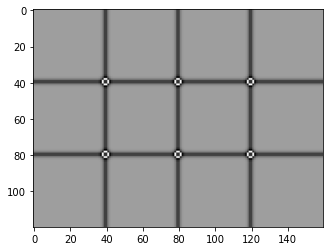

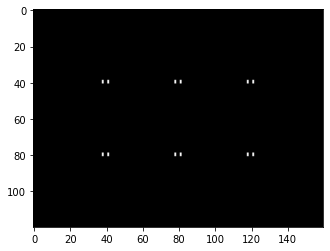

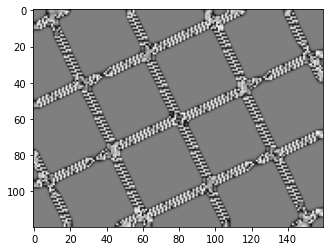

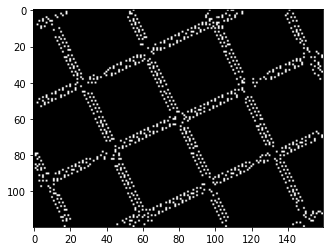

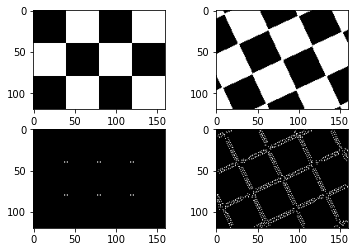

In [12]:
img_pairs = [['check.bmp', 'check_rot.bmp']]
dir = 'input/'
i = 0;

for [img1,img2] in img_pairs:
    i += 1
    img1 = cv2.imread(dir+img1, 0)
    img2 = cv2.imread(dir+img2, 0)
    r1 = harris(img1)
    r2 = harris(img2) #Note that threshod may need to be different from picture to another
    plt.figure(i)
    plt.subplot(221), plt.imshow(img1, cmap='gray')
    plt.subplot(222), plt.imshow(img2, cmap='gray')
    plt.subplot(223), plt.imshow(r1, cmap='gray')
    plt.subplot(224), plt.imshow(r2, cmap='gray')
    plt.show()